In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load your dataset 
data = pd.read_excel('Dyscalculia.xlsx')

In [3]:
data.head()

,Student,Number comparison,Number line placement,Number matching,Quick dot recognition,Number sorting in ascending order,Number sorting in descending order,Addition with counters,Subtraction story problem,Match the equation,Make a number by adding two numbers,Roll two dice and add the values,Group of objects counting,Pattern recognition,Find differences between two images,Find the bends in a string,Count legs of animals,Measure objects with units,Rearrange numbers by dragging,Dyscalculia Status
0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0
1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,3,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
3,4,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0
4,5,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0


In [4]:
# Basic dataset information
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Student                              700 non-null    int64
 1   Number comparison                    700 non-null    int64
 2   Number line placement                700 non-null    int64
 3   Number matching                      700 non-null    int64
 4   Quick dot recognition                700 non-null    int64
 5   Number sorting in ascending order    700 non-null    int64
 6   Number sorting in descending order   700 non-null    int64
 7   Addition with counters               700 non-null    int64
 8   Subtraction story problem            700 non-null    int64
 9   Match the equation                   700 non-null    int64
 10  Make a number by adding two numbers  700 non-null    int64
 11  Roll two dice and add the values     

In [5]:
print("\nDataset Summary:")
print(data.describe())


Dataset Summary:
         Student  Number comparison  Number line placement  Number matching  \
count  700.00000         700.000000             700.000000       700.000000   
mean   350.50000           0.874286               0.794286         0.877143   
std    202.21688           0.331764               0.404512         0.328508   
min      1.00000           0.000000               0.000000         0.000000   
25%    175.75000           1.000000               1.000000         1.000000   
50%    350.50000           1.000000               1.000000         1.000000   
75%    525.25000           1.000000               1.000000         1.000000   
max    700.00000           1.000000               1.000000         1.000000   

       Quick dot recognition  Number sorting in ascending order  \
count             700.000000                         700.000000   
mean                0.784286                           0.878571   
std                 0.411611                           0.326858   
mi

In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Student                                0
Number comparison                      0
Number line placement                  0
Number matching                        0
Quick dot recognition                  0
Number sorting in ascending order      0
Number sorting in descending order     0
Addition with counters                 0
Subtraction story problem              0
Match the equation                     0
Make a number by adding two numbers    0
Roll two dice and add the values       0
Group of objects counting              0
Pattern recognition                    0
Find differences between two images    0
Find the bends in a string             0
Count legs of animals                  0
Measure objects with units             0
Rearrange numbers by dragging          0
Dyscalculia Status                     0
dtype: int64


In [7]:
# Check for class distribution in the output variable
output_var = data.columns[-1]  # Assuming the last column is the target variable
print("\nClass Distribution in Output Variable:")
print(data[output_var].value_counts())


Class Distribution in Output Variable:
Dyscalculia Status
0    624
1     76
Name: count, dtype: int64


C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_17660\3208039255.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[output_var], palette='pastel')


Text(0, 0.5, 'Count')

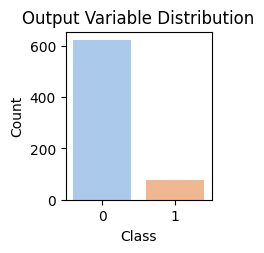

In [9]:
# Distribution of Output Variable
plt.subplot(2, 3, 2)
sns.countplot(x=data[output_var], palette='pastel')
plt.title('Output Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

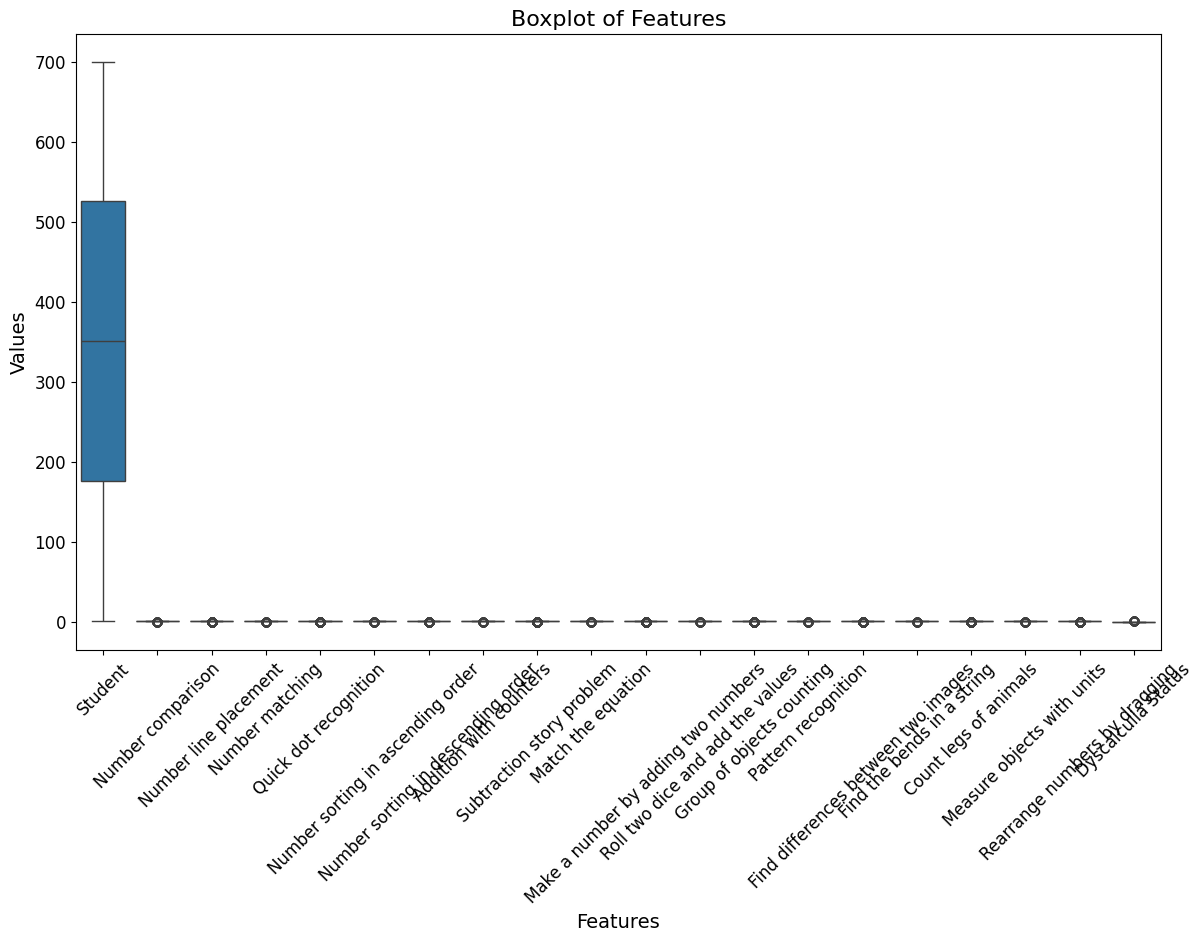

In [10]:
# Boxplot for feature distributions
plt.figure(figsize=(14, 8))  # Adjust the size of the figure
data_melted = data.melt(var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', data=data_melted)
plt.title('Boxplot of Features', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate and increase font size for x-axis labels
plt.yticks(fontsize=12)  # Increase font size for y-axis labels
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.show()


C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_17660\489954243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[output_var], y=data.iloc[:, 0], palette='Set2')


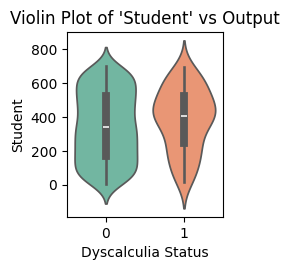

In [11]:
# Violin plot for distribution comparison
plt.subplot(2, 3, 6)
sns.violinplot(x=data[output_var], y=data.iloc[:, 0], palette='Set2')
plt.title(f"Violin Plot of '{data.columns[0]}' vs Output")

plt.tight_layout()
plt.show()

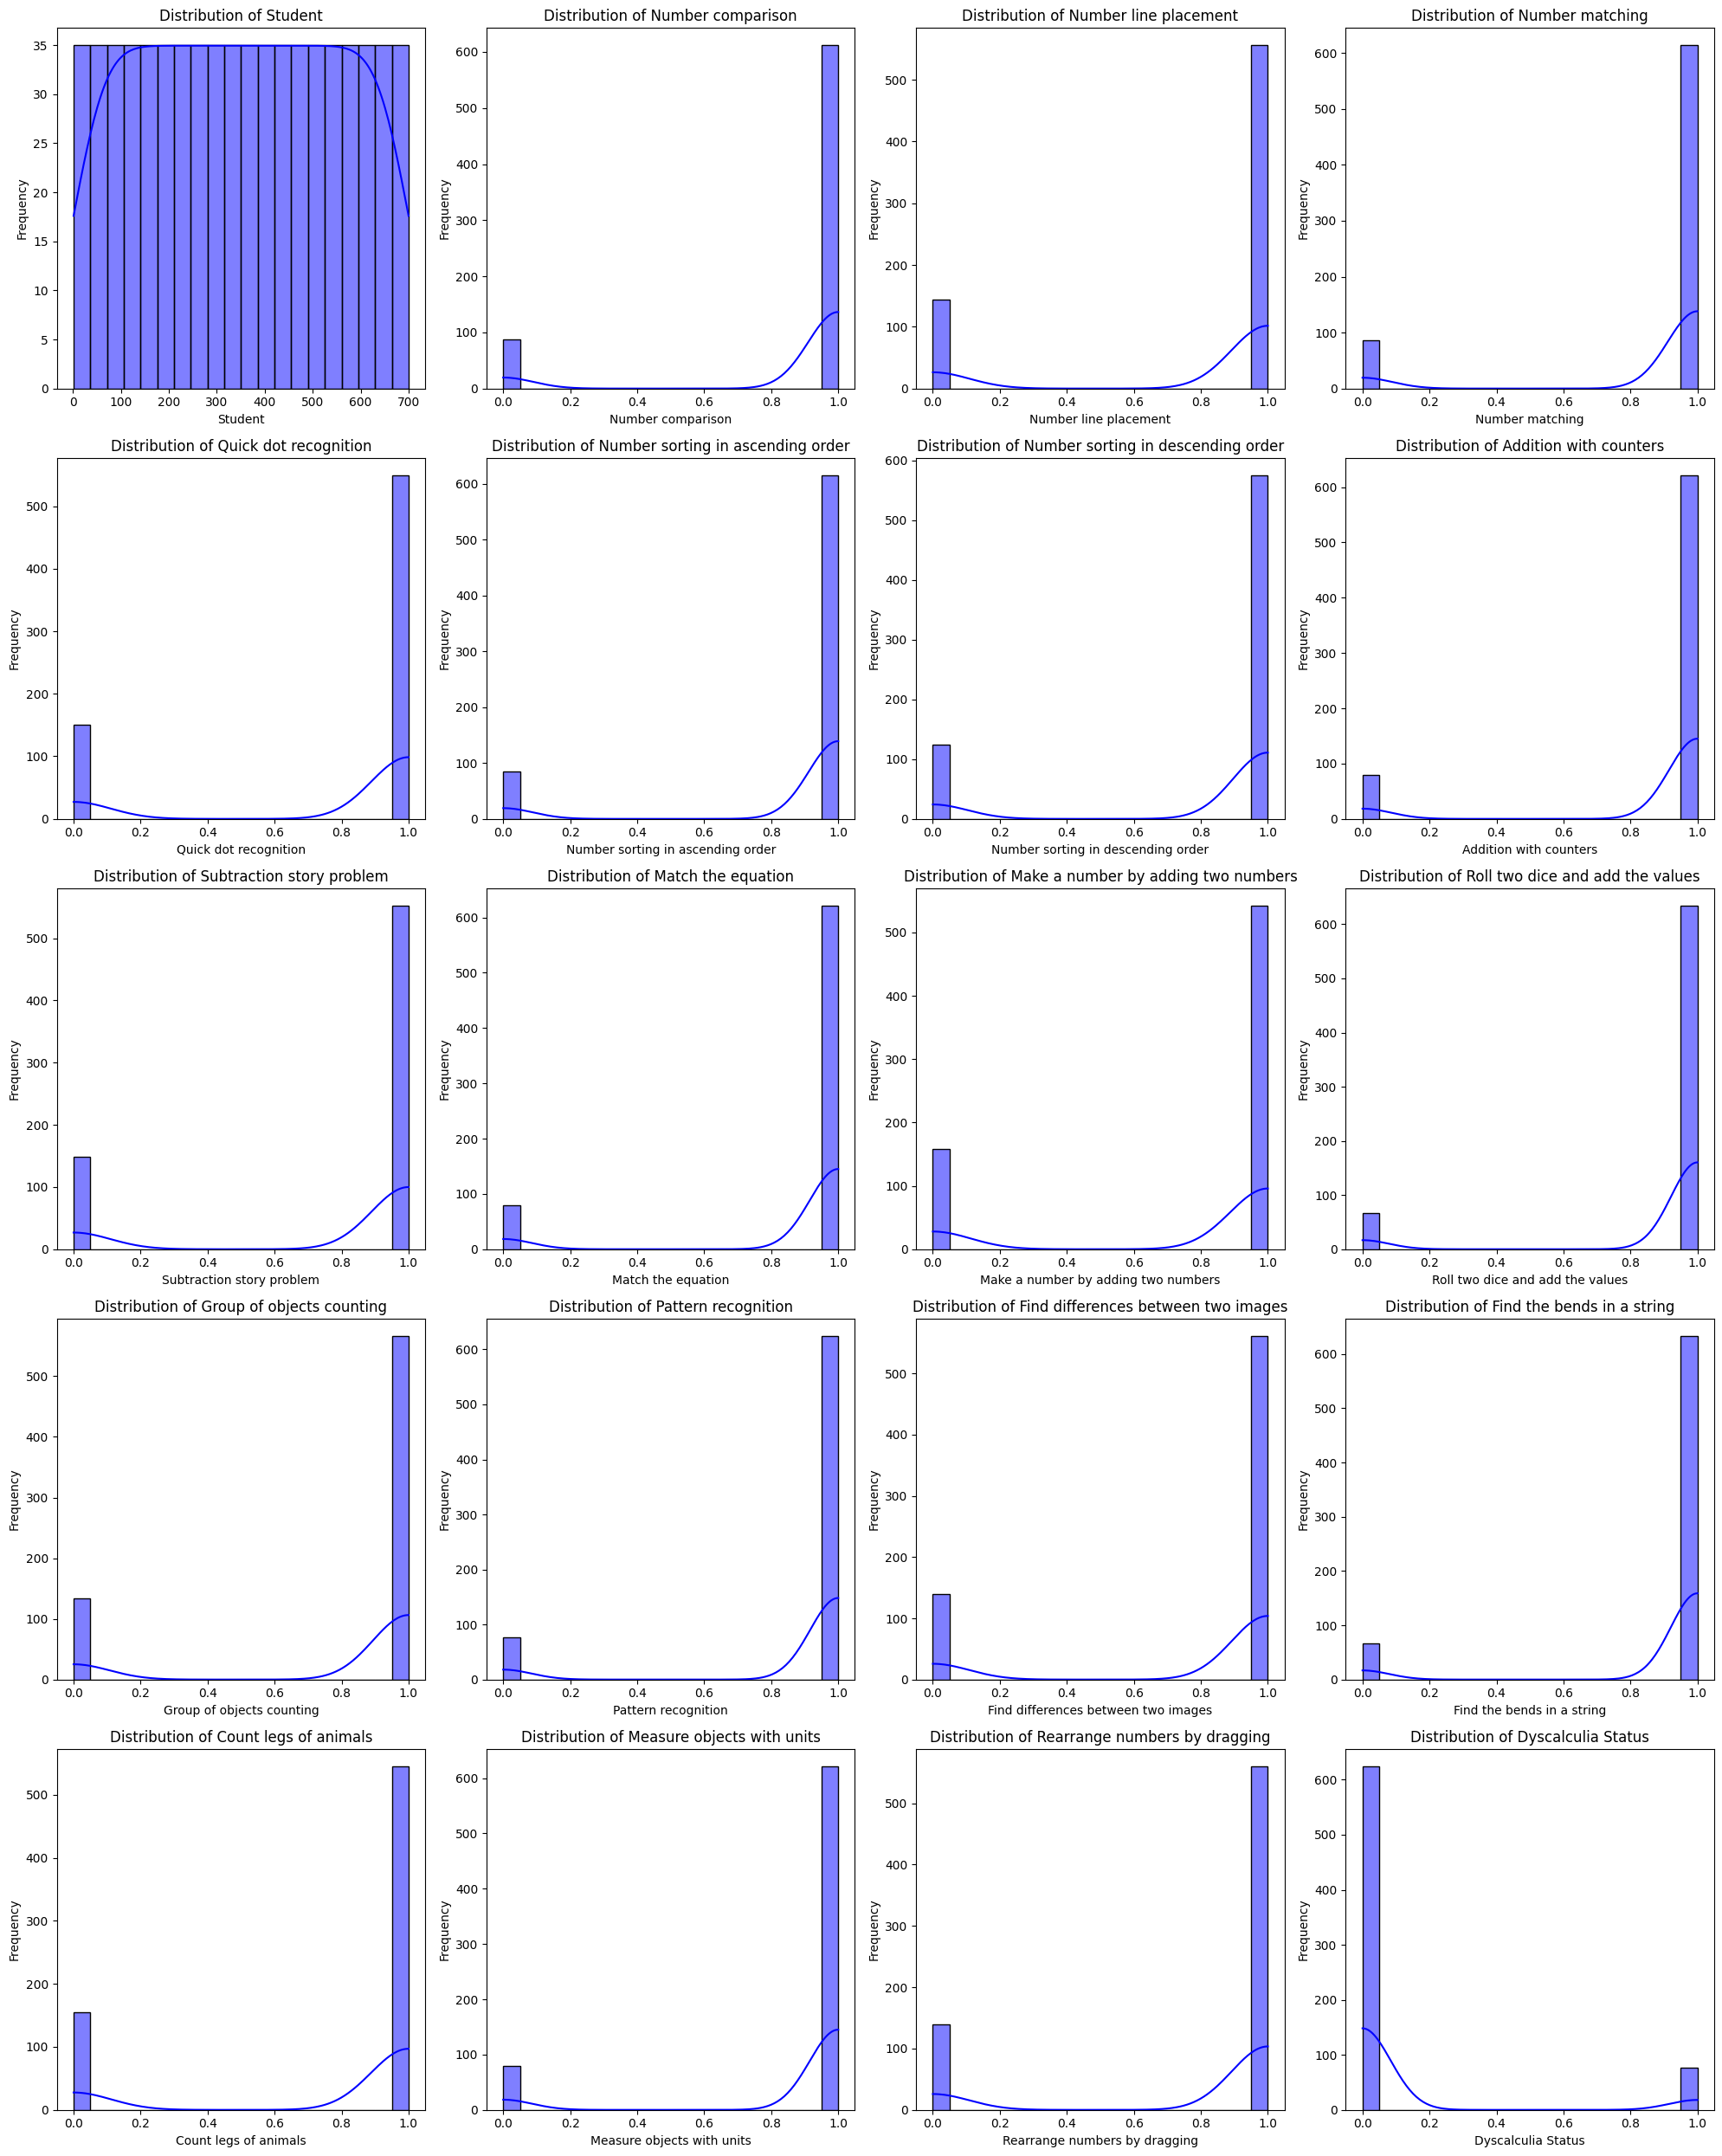

In [12]:
# Histograms for numeric features with 4 charts per row
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

# Number of features
num_features = len(numeric_features)

# Define rows and columns for the grid
n_cols = 4  # 4 charts per row
n_rows = (num_features // n_cols) + (num_features % n_cols > 0)  # Calculate rows required

plt.figure(figsize=(20, 5 * n_rows))  # Adjust the figure size for better readability

for i, col in enumerate(numeric_features, 1):  # Start numbering plots from 1
    plt.subplot(n_rows, n_cols, i)  # Position in the grid
    sns.histplot(data[col], kde=True, color='blue', bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [13]:
# Exclude 'Student' column and the class variable (assuming it's the last column)
X = data.drop(columns=['Student', 'Dyscalculia Status'])  # Replace 'ClassColumn' with the actual class column name
y = data['Dyscalculia Status']  # Set the target variable to the actual class column

In [14]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Initializing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(probability=True)
}

In [16]:
# Training and evaluating models
best_model = None
best_accuracy = 0
best_model_name = ""
model_accuracies = {}  # Dictionary to store model accuracies

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Store accuracy for plotting
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

Logistic Regression Accuracy: 0.9952
Random Forest Accuracy: 0.9952
Support Vector Classifier Accuracy: 0.9952


In [17]:
# Save the best model using pickle
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print(f"Best model '{best_model_name}' saved with accuracy {best_accuracy:.4f}")

Best model 'Logistic Regression' saved with accuracy 0.9952


C:\Users\LENOVO IDEAPAD\AppData\Local\Temp\ipykernel_17660\334769326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")


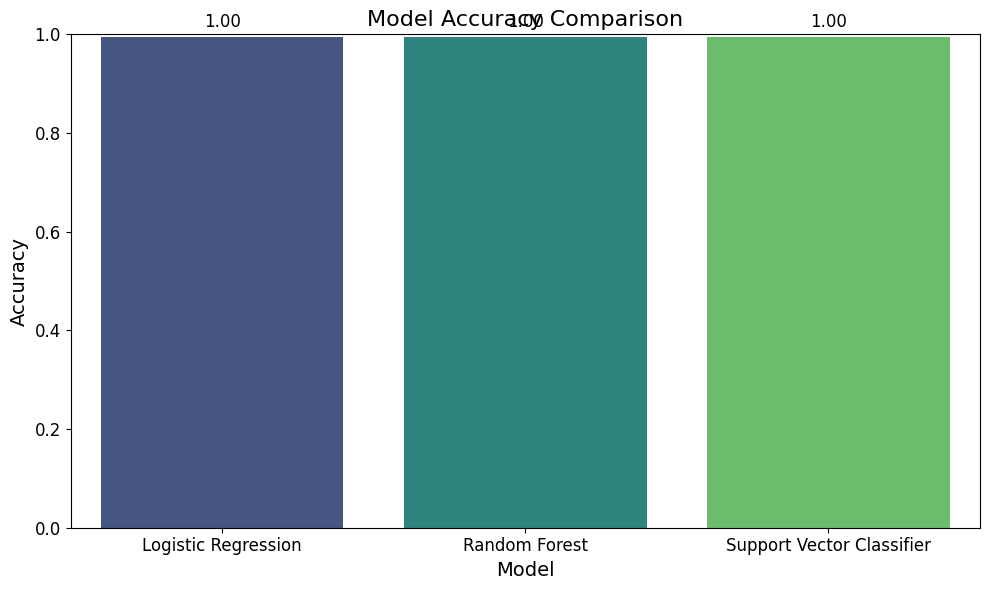

In [18]:
# Plot the accuracies
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with accuracy values
for i, row in enumerate(accuracy_df.itertuples()):
    plt.text(i, row.Accuracy + 0.02, f"{row.Accuracy:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [19]:
import pickle
import numpy as np

# Load the best model from the saved file
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

# Define column names
columns = [
    "Number comparison",
    "Number line placement",
    "Number matching",
    "Quick dot recognition",
    "Number sorting in ascending order",
    "Number sorting in descending order",
    "Addition with counters",
    "Subtraction story problem",
    "Match the equation",
    "Make a number by adding two numbers",
    "Roll two dice and add the values",
    "Group of objects counting",
    "Pattern recognition",
    "Find differences between two images",
    "Find the bends in a string",
    "Count legs of animals",
    "Measure objects with units",
    "Rearrange numbers by dragging"
]

# Define sample input as a dictionary (mentioning variable names)
sample_input = {
    "Number comparison": 1,
    "Number line placement": 0,
    "Number matching": 1,
    "Quick dot recognition": 0,
    "Number sorting in ascending order": 1,
    "Number sorting in descending order": 0,
    "Addition with counters": 1,
    "Subtraction story problem": 1,
    "Match the equation": 0,
    "Make a number by adding two numbers": 1,
    "Roll two dice and add the values": 0,
    "Group of objects counting": 1,
    "Pattern recognition": 1,
    "Find differences between two images": 0,
    "Find the bends in a string": 1,
    "Count legs of animals": 1,
    "Measure objects with units": 0,
    "Rearrange numbers by dragging": 1
}

# Convert the dictionary to a 2D array
# Ensure the order of features matches the model's training data
sample_values = np.array([list(sample_input.values())])

# Make predictions using the loaded model
predictions = best_model.predict(sample_values)

# Display the results
print("Sample Input:")
print(sample_input)
print("\nPredicted Output:")
print(predictions[0])  # Assuming binary classification, output will be 0 or 1


Sample Input:
{'Number comparison': 1, 'Number line placement': 0, 'Number matching': 1, 'Quick dot recognition': 0, 'Number sorting in ascending order': 1, 'Number sorting in descending order': 0, 'Addition with counters': 1, 'Subtraction story problem': 1, 'Match the equation': 0, 'Make a number by adding two numbers': 1, 'Roll two dice and add the values': 0, 'Group of objects counting': 1, 'Pattern recognition': 1, 'Find differences between two images': 0, 'Find the bends in a string': 1, 'Count legs of animals': 1, 'Measure objects with units': 0, 'Rearrange numbers by dragging': 1}

Predicted Output:
0


c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
